<a href="https://colab.research.google.com/github/YeaeunnKim/Deeplearning_E/blob/main/Week3_PBL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install idx2numpy

  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=88e88798f0ef53461d2225dc10446427a5deb58434c198bc9c86a3ecfc743132
  Stored in directory: /root/.cache/pip/wheels/e0/f4/e7/643fc5f932ec2ff92997f43f007660feb23f948aa8486f1107
Successfully built idx2numpy


In [ ]:
#import gzip
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image
import idx2numpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/KUBIG/2023_summer/')

Mounted at /content/drive


In [ ]:
#%cd /content/drive/MyDrive/KUBIG/2023_summer/
#!unzip "3주차-PBL-data.zip"

In [ ]:
import time

def timer(func):
    def wrapper(*args, **kwargs):
        start_time = time.time()
        result = func(*args, **kwargs)
        end_time = time.time()
        computation_time = end_time - start_time
        print(f"Execution time of {func.__name__}: {computation_time} seconds")
        return result
    return wrapper

In [ ]:
with open('train.pkl', 'rb') as f:
    train_data = pickle.load(f)

train_data

,n,potential,position,img_path
0,5,0.226,"[81, 117, 150, 182, 218]",train/image_0.png
1,7,0.448,"[93, 114, 132, 150, 167, 185, 206]",train/image_1.png
2,5,0.341,"[97, 125, 150, 174, 202]",train/image_2.png
3,8,0.390,"[82, 104, 123, 141, 158, 176, 195, 217]",train/image_3.png
4,8,0.404,"[83, 105, 124, 141, 158, 175, 194, 216]",train/image_4.png
...,...,...,...,...
59995,6,0.369,"[92, 117, 139, 160, 182, 207]",train/image_59995.png
59996,8,0.320,"[72, 98, 119, 140, 159, 180, 201, 227]",train/image_59996.png
59997,8,0.266,"[62, 91, 115, 138, 161, 184, 208, 237]",train/image_59997.png
59998,8,0.337,"[75, 99, 120, 140, 159, 179, 200, 224]",train/image_59998.png


In [ ]:
with open('valid.pkl', 'rb') as f:
    valid_data = pickle.load(f)

valid_data

,n,potential,position,img_path
0,6,0.457,"[100, 122, 140, 159, 177, 199]",valid/image_0.png
1,7,0.291,"[74, 102, 127, 150, 172, 197, 225]",valid/image_1.png
2,6,0.434,"[98, 121, 140, 159, 178, 201]",valid/image_2.png
3,8,0.435,"[86, 107, 125, 141, 158, 174, 192, 213]",valid/image_3.png
4,8,0.401,"[83, 105, 124, 141, 158, 175, 194, 216]",valid/image_4.png
...,...,...,...,...
9995,6,0.301,"[84, 113, 137, 162, 186, 215]",valid/image_9995.png
9996,8,0.345,"[76, 100, 121, 140, 159, 178, 199, 223]",valid/image_9996.png
9997,5,0.372,"[100, 126, 150, 173, 199]",valid/image_9997.png
9998,6,0.304,"[84, 113, 138, 161, 186, 215]",valid/image_9998.png


In [ ]:
train_data['img_path']

0            train/image_0.png
1            train/image_1.png
2            train/image_2.png
3            train/image_3.png
4            train/image_4.png
                 ...          
59995    train/image_59995.png
59996    train/image_59996.png
59997    train/image_59997.png
59998    train/image_59998.png
59999    train/image_59999.png
Name: img_path, Length: 60000, dtype: object

In [ ]:
train_data['img_path'].values

array(['train/image_0.png', 'train/image_1.png', 'train/image_2.png', ...,
       'train/image_59997.png', 'train/image_59998.png',
       'train/image_59999.png'], dtype=object)

In [ ]:
np.array(train_data['img_path'])

array(['train/image_0.png', 'train/image_1.png', 'train/image_2.png', ...,
       'train/image_59997.png', 'train/image_59998.png',
       'train/image_59999.png'], dtype=object)

In [ ]:
train_data[['n', 'potential']].values

array([[5.   , 0.226],
       [7.   , 0.448],
       [5.   , 0.341],
       ...,
       [8.   , 0.266],
       [8.   , 0.337],
       [6.   , 0.179]])

In [ ]:
np.array(train_data[['n', 'potential']]) # .values 와 같은 결과

array([[5.   , 0.226],
       [7.   , 0.448],
       [5.   , 0.341],
       ...,
       [8.   , 0.266],
       [8.   , 0.337],
       [6.   , 0.179]])

In [ ]:
data_dir = '/content/drive/My Drive/KUBIG/2023_summer/'

In [ ]:
# 시도 1
class custom_PBL_train_dataset(torch.utils.data.Dataset):
    def __init__(self, data_dir, train=True, transform=None):

        self.data_dir = data_dir

        if train:
            self.input_path = train_data['img_path'].values
            self.target = train_data[['n', 'potential']].values # 경로가 아닌 그 자체로 target
        else:
            self.input_path = valid_data['img_path'].values
            self.target = valid_data[['n', 'potential']].values # np.array(valid_data[['n', 'potential']])

        if transform is None:
            self.transform = torch.Tensor
        else:
            self.transform = transform

    def __len__(self):
        return len(self.target)

    def __getitem__(self, index):

        input_file = Image.open(self.data_dir + self.input_path[index])
        self.input = np.array(input_file) # idx2numpy 대신 np.array로 array 변환

        img = self.transform(self.input)
        label = self.transform(self.target[index])

        return img, label

In [ ]:
custom_train_data = custom_PBL_train_dataset(data_dir, train=True)
custom_test_data = custom_PBL_train_dataset(data_dir, train=False)

from torch.utils.data.dataloader import DataLoader

train_loader = DataLoader(dataset=custom_train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(dataset=custom_test_data, batch_size=16, shuffle=False)

In [ ]:
# input 과 output 의 sampling 확인
x, y = next(iter(train_loader))

In [ ]:
x.shape

torch.Size([16, 10, 300])

In [22]:
y.shape

torch.Size([16, 2])

In [25]:
y[0]

tensor([8.0000, 0.3930])

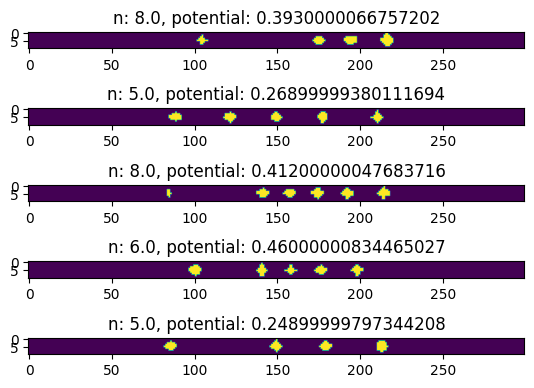

In [27]:
# sample된 이미지 출력
for i in range(5):
    plt.subplot(5, 1, i+1)
    plt.imshow(x[i])
    plt.title("n: {}, potential: {}".format(y[i][0], y[i][1]))